In [1]:
import pandas as pd

data = {
    "Microbe": ["Bifidobacterium", "Lactobacillus", "Streptococcus", "E. coli", "Clostridium", "Enterococcus", "Bacteroides"],
    "Sample1": [100, 80, 30, 5, 2, 0, 0],
    "Sample2": [90, 70, 50, 20, 10, 0, 5],
    "Sample3": [130, 90, 25, 15, 8, 5, 5],
    "Sample4": [100, 100, 100, 100, 100, 100, 100],
    "Sample5": [150, 0, 0, 0, 0, 0, 0],
    "Sample6": [30, 30, 30, 30, 30, 30, 30]
}

df = pd.DataFrame(data)
df.set_index("Microbe", inplace=True)
df

relative_abundance = df.div(df.sum(axis=0), axis=1) * 100
relative_abundance = relative_abundance.round(2)
relative_abundance


,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6
Microbe,,,,,,
Bifidobacterium,46.08,36.73,46.76,14.29,100.0,14.29
Lactobacillus,36.87,28.57,32.37,14.29,0.0,14.29
Streptococcus,13.82,20.41,8.99,14.29,0.0,14.29
E. coli,2.30,8.16,5.40,14.29,0.0,14.29
Clostridium,0.92,4.08,2.88,14.29,0.0,14.29
Enterococcus,0.00,0.00,1.80,14.29,0.0,14.29
Bacteroides,0.00,2.04,1.80,14.29,0.0,14.29


In [2]:
from sklearn.cluster import KMeans


In [5]:
# Prepare data (samples x microbes)
X = relative_abundance.T

# Create and fit model with 2 clusters (can experiment with more)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add cluster labels to your DataFrame
X["Cluster"] = kmeans.labels_
X


Microbe,Bifidobacterium,Lactobacillus,Streptococcus,E. coli,Clostridium,Enterococcus,Bacteroides,Cluster
Sample1,46.08,36.87,13.82,2.30,0.92,0.00,0.00,0
Sample2,36.73,28.57,20.41,8.16,4.08,0.00,2.04,0
Sample3,46.76,32.37,8.99,5.40,2.88,1.80,1.80,0
Sample4,14.29,14.29,14.29,14.29,14.29,14.29,14.29,2
Sample5,100.00,0.00,0.00,0.00,0.00,0.00,0.00,1
Sample6,14.29,14.29,14.29,14.29,14.29,14.29,14.29,2


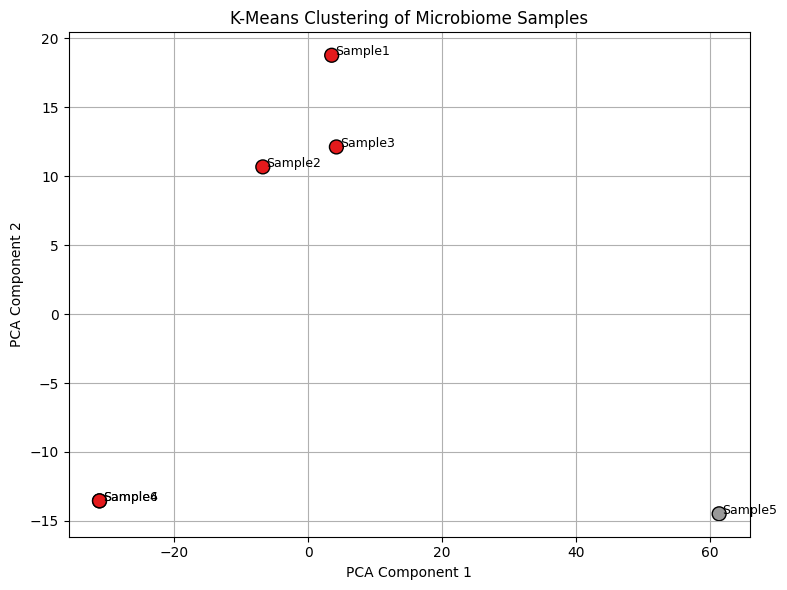

In [12]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Prepare the data
X = relative_abundance.T  # samples x microbes

# Step 2: Fit KMeans (choose number of clusters)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Step 3: Add cluster assignments to DataFrame
X["Cluster"] = kmeans.labels_

# Step 4: (Optional) Map numeric clusters to labels
X["Cluster Label"] = X["Cluster"].map({0: "Balanced-like", 1: "Dysbiotic-like"})
# If your clusters look reversed, you can swap the values in the map

# Step 5: PCA for plotting (same as before)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.drop(columns=["Cluster", "Cluster Label"]))

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X["Cluster"], cmap="Set1", s=100, edgecolor="k")

plt.title("K-Means Clustering of Microbiome Samples")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Annotate each point with sample names
for i, sample_name in enumerate(X.index):
    plt.text(X_pca[i, 0] + 0.5, X_pca[i, 1], sample_name, fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()



In [13]:
X


Microbe,Bifidobacterium,Lactobacillus,Streptococcus,E. coli,Clostridium,Enterococcus,Bacteroides,Cluster,Cluster Label
Sample1,46.08,36.87,13.82,2.30,0.92,0.00,0.00,0,Balanced-like
Sample2,36.73,28.57,20.41,8.16,4.08,0.00,2.04,0,Balanced-like
Sample3,46.76,32.37,8.99,5.40,2.88,1.80,1.80,0,Balanced-like
Sample4,14.29,14.29,14.29,14.29,14.29,14.29,14.29,0,Balanced-like
Sample5,100.00,0.00,0.00,0.00,0.00,0.00,0.00,1,Dysbiotic-like
Sample6,14.29,14.29,14.29,14.29,14.29,14.29,14.29,0,Balanced-like


In [16]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

df_count = pd.DataFrame({
    "Sample1": [10, 60, 40, 30, 10],
    "Sample2": [20, 20, 30, 40, 50],
    "Sample3": [80, 40, 30, 20, 10],
    "Sample4": [0, 10, 10, 20, 30],
    "Sample5": [20, 30, 50, 60, 80],
    "Sample6": [50, 60, 70, 30, 20]
}, index=["Bif", "Lactobacilli", "Strep", "Staph", "Colostridium"])

def run_microbiome_pipeline(df_count):
    relative_abundance = df_count.div(df_count.sum(axis=0), axis=1) *100
    relative_abundance = relative_abundance.round(2)
    X_features = relative_abundance.T
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(X_features)
    X_features["Cluster"] = kmeans.labels_
    X_features["Cluster Label"] = X_features["Cluster"].map({0: "Balanced-like", 1: "Dysbiotic-like"})
    X_train, X_test, y_train, y_test = train_test_split(X_features.drop(columns=["Cluster", "Cluster Label"]), X_features["Cluster"], test_size=0.3, random_state=42, stratify=X_features["Cluster"])
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    

    importances = results["feature_importances"]
    features = results["clustered_data"].drop(columns=["Cluster", "Cluster Label"]).columns

    plt.figure(figsize=(8, 4))
    plt.barh(features, importances, color="skyblue")
    plt.xlabel("Feature Importance")
    plt.title("Microbial Features Driving Cluster Prediction")
    plt.tight_layout()
    plt.show()

    return {"clustered_data": X_features, "model": clf,"feature_importances": clf.feature_importances_}




In [10]:
run_microbiome_pipeline(df_count)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [12]:
results = run_microbiome_pipeline(df_count)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [13]:
results["clustered_data"]
results["model"]
results["feature_importances"]



array([0.27941176, 0.10784314, 0.23039216, 0.26470588, 0.11764706])

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



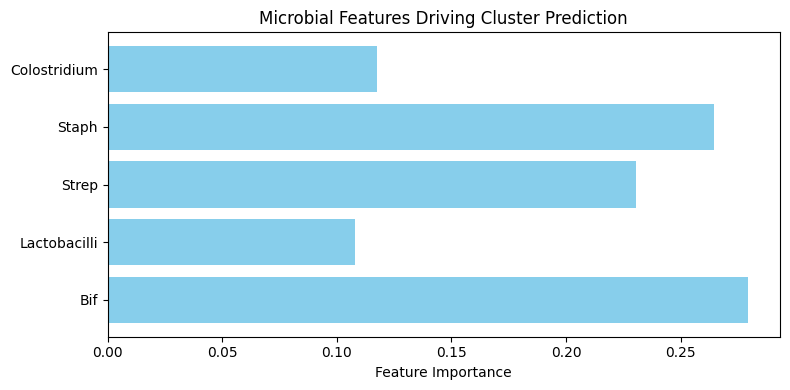

In [17]:
results = run_microbiome_pipeline(df_count)


In [18]:
new_sample = pd.DataFrame({
    "New Sample": [40, 60, 30, 20, 10]}, index=["Bif", "Lactobacilli", "Strep", "Staph", "Colostridium"])

relative_abundance = new_sample.div(new_sample.sum(axis=0), axis=1) *100
relative_abundance = relative_abundance.round(2)
X_features = relative_abundance.T

results["model"].predict(X_features)

predicted_cluster = results["model"].predict(X_features)[0]
label = {0: "Balanced-like", 1: "Dysbiotic-like"}[predicted_cluster]
print(f"Predicted Cluster: {predicted_cluster} ({label})")



Predicted Cluster: 0 (Balanced-like)


In [ ]:
def classify_new_sample(new_sample_df, trained_model):
    relative_abundance = new_sample_df.div(new_sample_df.sum(axis=0), axis=1) * 100
    relative_abundance = relative_abundance.round(2)
    X_features = relative_abundance.T
    predicted_cluster = trained_model.predict(X_features)[0]
    label_map = {0: "Balanced-like", 1: "Dysbiotic-like"}
    label = label_map.get(predicted_cluster, "Unknown")
